In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd

In [2]:
# Load data
Thiers13_delays = pd.read_csv('data/Thiers13_delays.csv').to_numpy()
Workplace15_delays = pd.read_csv('data/Workplace15_delays.csv').to_numpy()
buffer_lin = pd.read_csv('data/buffer_lin.csv').to_numpy()
buffer_log = pd.read_csv('data/buffer_log.csv').to_numpy()

In [3]:
# Using a standardized style set that largely holds to Nature's guidelines.
plt.style.use('science')
plt.style.use(['science','nature'])

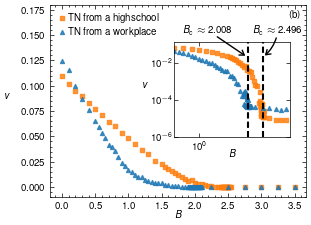

In [4]:
size = 8
fig, ax1 = plt.subplots()

ax1.scatter(buffer_lin,  Thiers13_delays, label=r"$\mathrm{TN\ from\ a\ highschool}$", alpha=0.8, c="tab:orange", s=size, marker="s")
ax1.scatter(buffer_log, Workplace15_delays, label=r"$\mathrm{TN\ from\ a\ workplace}$", alpha=0.8, c="tab:blue", s=size, marker="^")
ax1.set_xlabel(r"$B$", rotation=0, labelpad=0)
ax1.set_ylabel(r"$v$", rotation= 0, labelpad=10)
ax1.set_ylim(-0.01, 0.18)

# ax1.tick_params(axis="x", labelsize=12)
# ax1.tick_params(axis="y", labelsize=12)

ax1.legend(frameon=False, handlelength=.5, handletextpad=0.4, bbox_to_anchor=(0, 1), loc="upper left")


# Inset
left, bottom, width, height = [0.5, 0.35, 0.35, 0.38]
ax2 = fig.add_axes([left, bottom, width, height], zorder=5)

ax2.scatter(buffer_lin,  Thiers13_delays, label=r"$\mathrm{TN\ from\ a\ highschool}$", alpha=0.8, c="tab:orange", s=size,marker="s")
ax2.scatter(buffer_log, Workplace15_delays, label=r"$\mathrm{TN\ from\ a\ workplace}$", alpha=0.8, c="tab:blue", s=size,marker="^")

ax2.set_xlabel(r"$B$", rotation=0, labelpad=-1)
ax2.set_ylabel(r"$v$", rotation= 0, labelpad=4)

ax2.set_xlim(0.7)
ax2.set_ylim(1E-6)
ax2.set_yscale("log")
ax2.set_xscale("log")

bcwork = 2.008
bcschool = 2.496

ax2.vlines(bcschool, ymin=1E-7, ymax = 1, ls=(0,(3,1.5)), color="black", 
            linewidth=1.5)#label=r"$\mathrm{highschool}\ B_\mathrm{c} \approx$ " +r"$2.07$",
ax2.vlines(bcwork, ymin=1E-7, ymax = 1, ls=(0,(3,1.5)), color="black", 
            linewidth=1.5)#label=r"$\mathrm{workplace}\ B_\mathrm{c} \approx$ " +r"$2.54$",

ax2.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax2.yaxis.set_tick_params(direction="in", pad = 1)
ax2.tick_params(axis="both")
ax2.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(0.1,)))
ax2.xaxis.set_tick_params(direction="in")


# annotation (b)
ax1.text(0.98, 0.97, r"$\mathrm{(b)}$", transform=ax1.transAxes,
        horizontalalignment='right', verticalalignment='top')

# Bc annotations
arrow_x = bcwork # x-coordinate of the arrow
arrow_y = 2E-2 # y-coordinate of the arrow
text_x = 0.8  # x-coordinate of the text box
text_y = 0.4*1E-0 # y-coordinate of the text box
ax2.annotate(r'$B_\mathrm{c} \approx 2.008$', 
            xy=(arrow_x, arrow_y), xytext=(text_x, text_y),arrowprops=dict(arrowstyle='->,head_length=0.45,head_width=0.3', connectionstyle="arc3,rad=-0"), color='black',
            zorder = 100,
            bbox=dict(pad=0, facecolor="none", edgecolor="none"))  
            

arrow_x =bcschool  # x-coordinate of the arrow
arrow_y = 2E-2 # y-coordinate of the arrow
text_x = 2.17  # x-coordinate of the text box
text_y = 0.4*1E-0 # y-coordinate of the text box
ax2.annotate(r'$B_\mathrm{c} \approx 2.496$', 
            xy=(arrow_x, arrow_y), xytext=(text_x, text_y),arrowprops=dict(arrowstyle='->,head_length=0.45,head_width=0.3', connectionstyle="arc3,rad=-0.2"), color='black',
            zorder = 100,
            bbox=dict(pad=0, facecolor="none", edgecolor="none"))  


plt.savefig("RW_v_graph.pdf", bbox_inches='tight')


In [9]:
import pandas as pd

# Main plot scatter data
Thiers_plot_data = {
    'buffer_lin_Thiers13': buffer_lin.flatten(),
    'Thiers13_delays': Thiers13_delays.flatten()}
Workplace_plot_data = {
    'buffer_log_Workplace15': buffer_log.flatten(),
    'Workplace15_delays': Workplace15_delays.flatten()
}

Thiers_plot_data = pd.DataFrame(Thiers_plot_data)
Thiers_plot_data.to_csv('Thiers13_source_data.csv', index=False)

Workplace_plot_data = pd.DataFrame(Workplace_plot_data)
Workplace_plot_data.to_csv('Workplace15_source_data.csv', index=False)

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('fig_source_data/all_source_data.xlsx', engine='xlsxwriter') as writer:
    Thiers_plot_data.to_excel(writer, sheet_name='Thiers13_delays', index=False)
    Workplace_plot_data.to_excel(writer, sheet_name='Workplace15_delays', index=False)